# 0 - Context
---
The is related to a restaurant located at the South of Brasil.

This dataset is combining several variables from different nature, such as: Customer, Whether, Sales History, Competitors and more.

The idea behind is to aggregate on a singular `dataset.csv`, all the necessary information to predict the next day sales (VENDAS)

# 1 - Evaluation 
---
RMSE (with or without cross validation)

MAE (with or without cross validation)

# 2 - Setting Notebook Config
---
Full size

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 3 - Reading CSV

---

Here we are reading the dataset and adding a *df* variable

It is good to notice that the `dataset.csv` has passed through the **OneHotEncoding** technique

In [3]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
pd.set_option('display.max_rows', 500)

# 4 - Pre processing the Dataset

---

Here we are adding some new columns which may increase the model perfomance

In [4]:
import math

def get_vendas_ontem(df):
    first_row = 1
    df_temp = df['VENDAS'].shift(1)
    df_temp[0:first_row] = df[0:first_row]['VENDAS']
    
    for i in range(len(df_temp)):
        row_value = df_temp[i]
        inner_index = i
        while row_value == 0 or math.isnan(row_value):
            inner_index = inner_index - 1
            row_value = df_temp[inner_index]

        df_temp[i] = row_value.round().astype(int)
    return df_temp

df.insert(loc=20, column='VENDAS_ONTEM', value=(get_vendas_ontem(df)))

df['DATA'] = (pd.to_datetime(df['DATA'], dayfirst=True))

# 5 - Removing Outliers

---

Here we are removing the records which are appearing less than 3% (the outliers)

In [5]:
df = df.query('VENDAS < 200 and VENDAS > 70')
df = df.query('FECHADO == 0 and ABERTO == 1')

# 6 - Dropping Columns

---

Here we are removing the columns that are ambiguos

In [6]:
import numpy as np

df = df.drop(columns=['FECHADO', 'ABERTO', 'DS', 'DATA_NAO_FESTIVA', 'BAIXA_TEMPORADA', 'SEMANA_DE_NAO_PAGAMENTO', 'NAO_FERIADO'])

# saving variable for later
all_columns = np.array(df.columns)

# 7 - Exploratory Data Analysis (EDA)
---
The main idea here is to investigate and get to know better our dataset

## 7.1 - Basic 

Here are looking for IsNull & IsNA & Checking the Dataset structure


In [7]:
df.describe()

,VENDAS,FDS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,FERIADO,SEMANA_PAGAMENTO,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE,VENDAS_ONTEM
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,126.946853,0.279720,0.004196,0.043357,0.027972,0.01958,0.304895,0.825175,10.040559,8.160839,28.020979,77.902098,126.927273
std,23.253324,0.449176,0.064684,0.203801,0.165008,0.13865,0.460685,0.380083,1.176226,9.106167,5.920184,10.585331,24.603415
min,73.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000,5.000000,15.000000,50.000000,59.000000
25%,110.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,9.000000,5.000000,25.000000,70.000000,110.000000
50%,128.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,10.000000,5.000000,30.000000,80.000000,128.000000
75%,140.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,11.000000,5.000000,30.000000,85.000000,140.000000
max,196.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,13.000000,80.000000,40.000000,100.000000,229.000000


In [8]:
print(f'Does the Dataset has null values?: {df.isnull().values.any()}')
print(f'Does the Dataset has N/A values?: {df.isna().values.any()}')
print(f'What is the dataset format?: {df.shape}')
df.info()
df

Does the Dataset has null values?: False
Does the Dataset has N/A values?: False
What is the dataset format?: (715, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 751
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA                  715 non-null    datetime64[ns]
 1   VENDAS                715 non-null    int64         
 2   FDS                   715 non-null    int64         
 3   DATA_FESTIVA          715 non-null    int64         
 4   VESPERA_DATA_FESTIVA  715 non-null    int64         
 5   POS_DATA_FESTIVA      715 non-null    int64         
 6   FERIADO               715 non-null    int64         
 7   SEMANA_PAGAMENTO      715 non-null    int64         
 8   ALTA_TEMPORADA        715 non-null    int64         
 9   QTD_CONCORRENTES      715 non-null    int64         
 10  PRECIPITACAO          715 non-null    int64         
 11  TEMPERATURA     

,DATA,VENDAS,FDS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,FERIADO,SEMANA_PAGAMENTO,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE,VENDAS_ONTEM
0,2018-02-14,132,0,0,0,1,0,0,0,7,5,30,70,132.0
1,2018-02-15,149,0,0,0,1,0,0,0,7,5,30,65,132.0
2,2018-02-16,130,0,0,0,0,0,0,0,7,5,35,65,149.0
3,2018-02-17,174,1,0,0,0,0,0,0,7,5,35,70,130.0
4,2018-02-18,185,1,0,0,0,0,0,0,7,5,35,60,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2020-03-01,87,1,0,0,0,0,0,1,13,5,35,70,117.0
747,2020-03-02,99,0,0,0,0,0,0,1,13,5,30,70,87.0
749,2020-03-04,98,0,0,0,0,0,0,1,13,5,30,70,70.0
750,2020-03-05,121,0,0,0,0,0,1,1,13,5,30,70,98.0


## 7.2 - Overview

Here are getting to know more about the whole period, the semester, the standard deviation and etc.

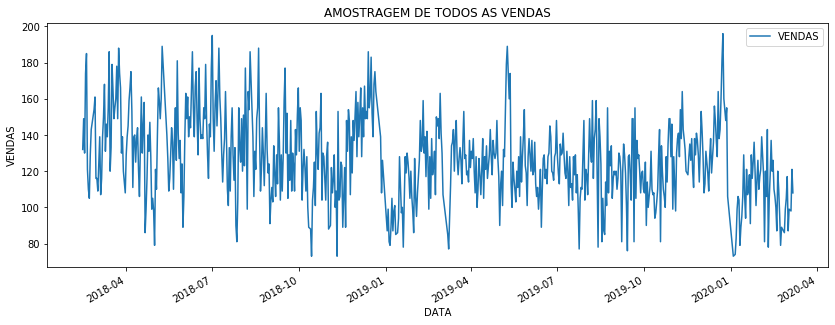

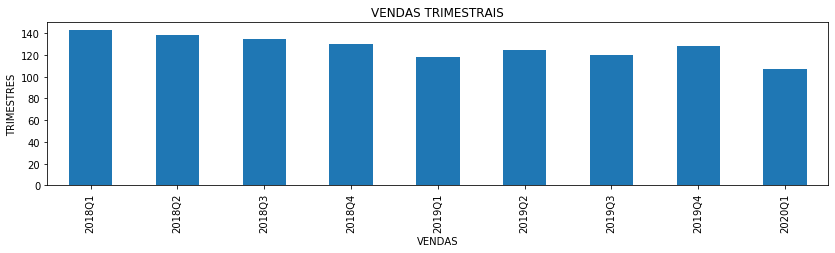

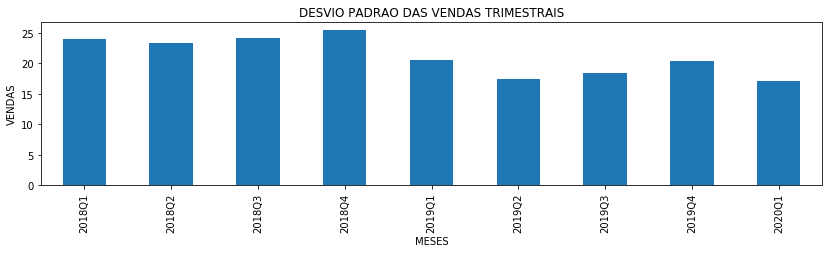

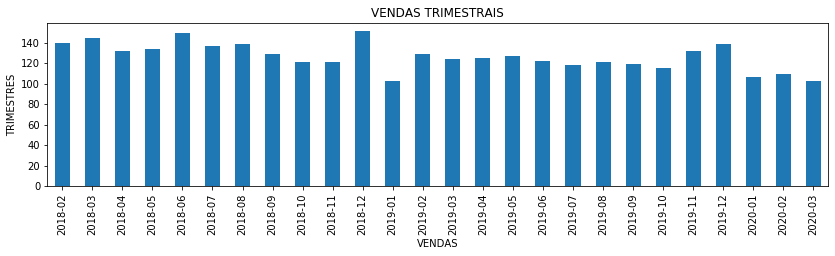

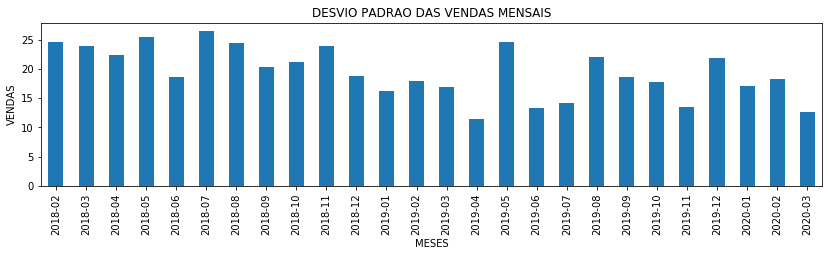

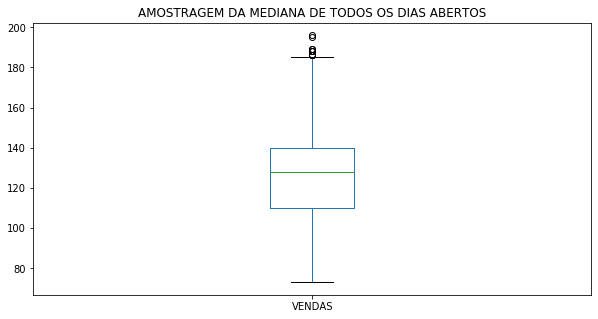

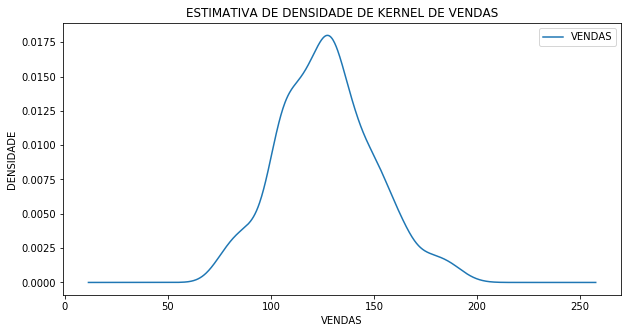

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = df.plot(y=['VENDAS'], x='DATA', figsize=(14, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS AS VENDAS')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()    

df_quarter = pd.DataFrame({'DATA': pd.to_datetime(df['DATA']), 'TEMPERATURA': df['TEMPERATURA'], 'VENDAS': df['VENDAS']})

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS TRIMESTRAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS MENSAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

## 7.3 - Features & Correlation

Here we are checking what is the correlatio between a feature and our target variable, to check how it is influence

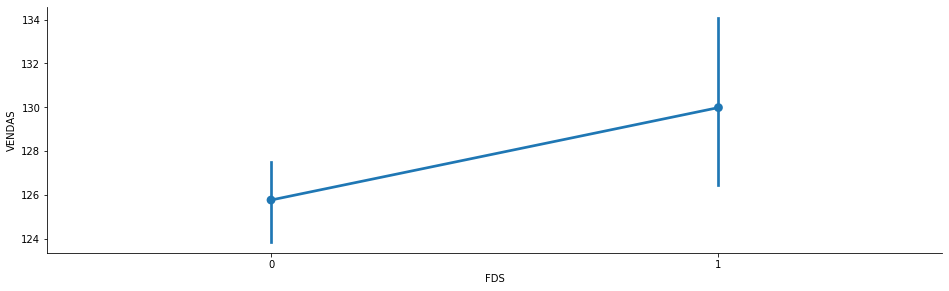

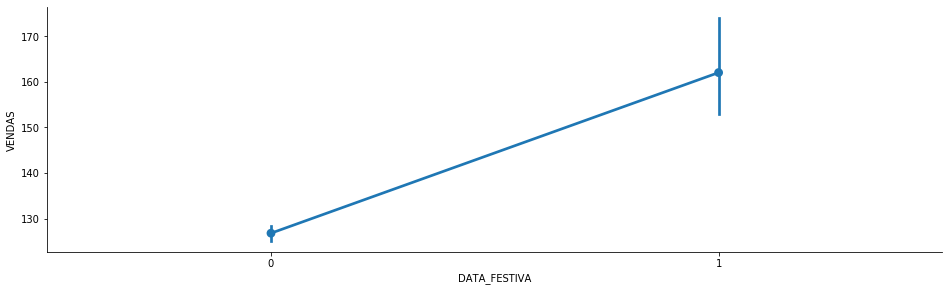

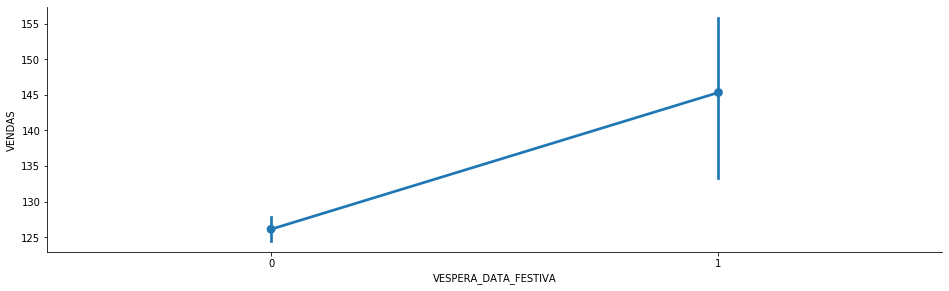

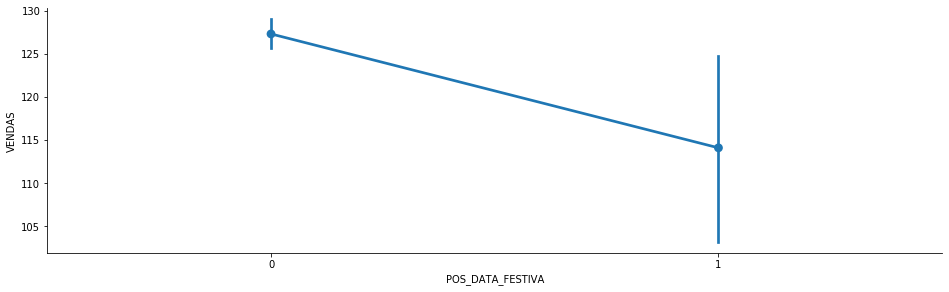

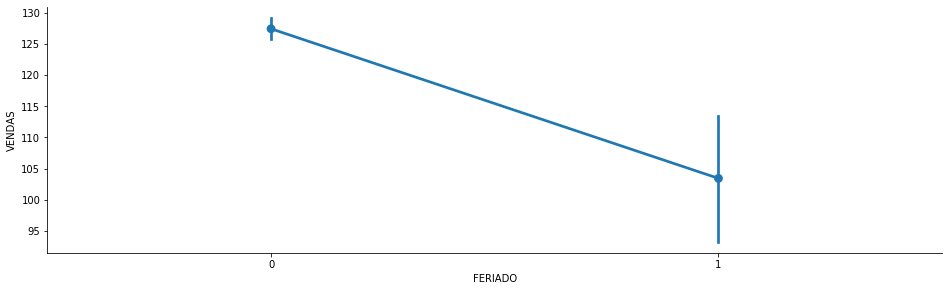

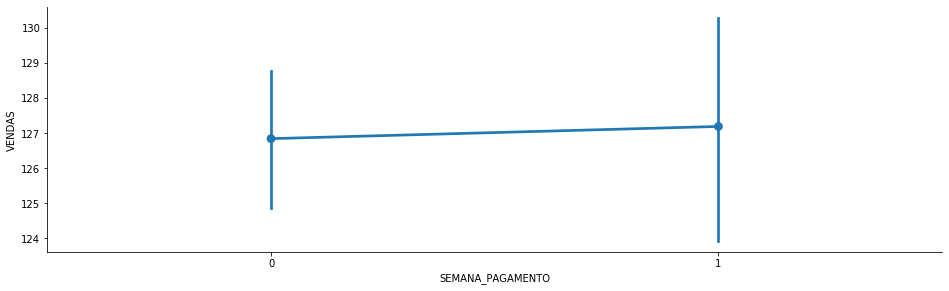

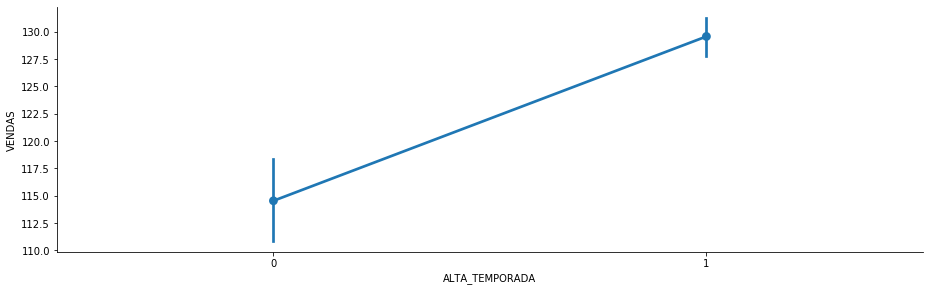

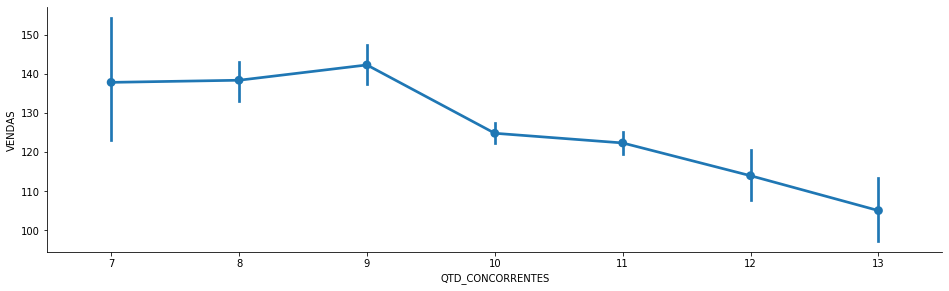

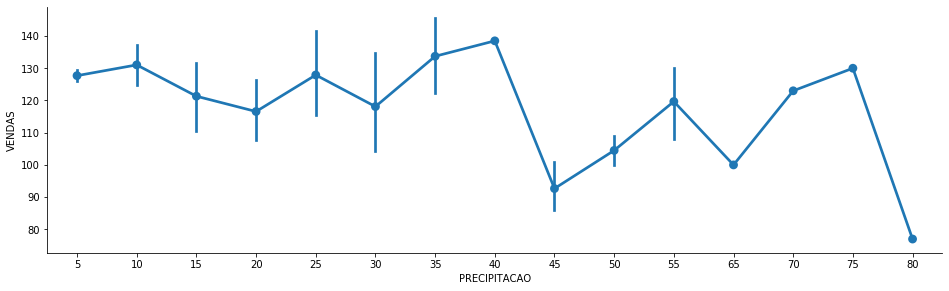

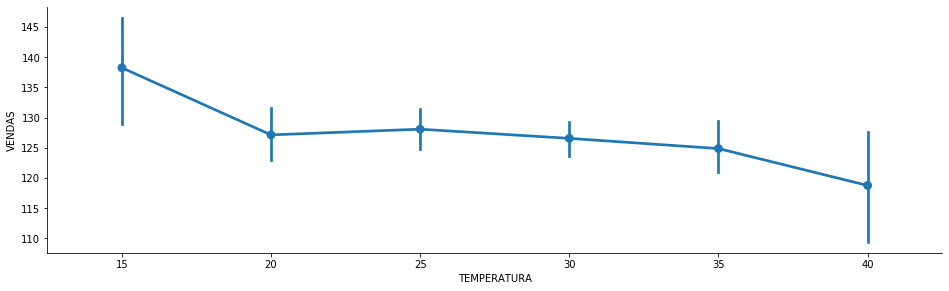

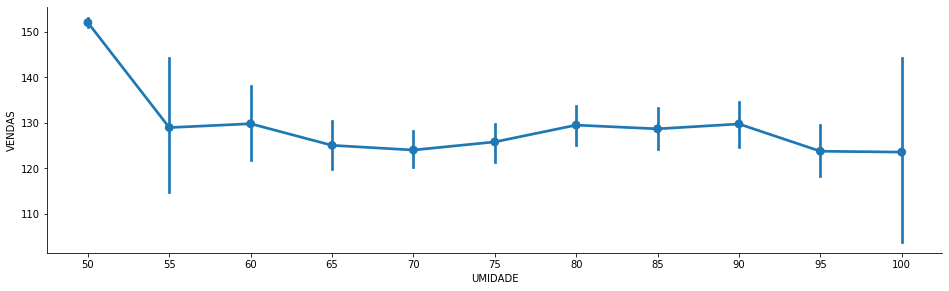

In [10]:
df_scatter = df.sort_values(by=['VENDAS'], ascending=True)

c = sns.catplot('FDS', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('VESPERA_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('POS_DATA_FESTIVA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('FERIADO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('SEMANA_PAGAMENTO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('ALTA_TEMPORADA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('QTD_CONCORRENTES', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('PRECIPITACAO', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('TEMPERATURA', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)

c = sns.catplot('UMIDADE', 'VENDAS', data=df_scatter, kind='point')
c.fig.set_figwidth(15)
c.fig.set_figheight(4)